In [42]:
import numpy as np
import speechpy
import scipy.io.wavfile as wav

def compute_mfe(audio_file, duration=1):
    """
    Tính toán Mel Frequency Energies (MFE) từ một tệp âm thanh.

    :param audio_file: Đường dẫn đến tệp âm thanh.
    :param duration: Thời lượng (tính bằng giây) của tín hiệu cần xử lý (mặc định là 1 giây).
    :return: MFE feature array và kích thước của nó.
    """
    # Đọc tệp âm thanh
    sampling_frequency, signal = wav.read(audio_file)

    # Kiểm tra số kênh của tín hiệu và chuyển đổi thành mono nếu cần
    if len(signal.shape) == 2:
        signal = np.mean(signal, axis=1)

    # Lấy một phần của tín hiệu nếu cần thiết
    signal = signal[:int(duration * sampling_frequency)]

    # Chuẩn hóa tín hiệu
    signal = signal / np.max(np.abs(signal))

    # Tính toán Mel Frequency Energies
    mfe, _ = speechpy.feature.mfe(signal, sampling_frequency)

    return mfe


In [43]:
mfe = compute_mfe('./Snoring Dataset/0/0_0.wav', duration=1)

C:\Users\TDC\AppData\Local\Temp\ipykernel_19928\2953371419.py:14: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sampling_frequency, signal = wav.read(audio_file)


In [44]:
print("MFE features:", mfe)

MFE features: [[8.47702106e-05 8.47702106e-05 2.15425839e-05 ... 2.33681998e-06
  1.82710708e-06 1.93546997e-06]
 [1.08283311e-04 1.08283311e-04 8.91222787e-05 ... 2.63752061e-06
  2.75904234e-06 1.73425881e-06]
 [1.29256888e-05 1.29256888e-05 1.26487249e-05 ... 1.95125316e-06
  3.34211461e-06 3.51278040e-06]
 ...
 [1.04603497e-02 1.04603497e-02 1.17720632e-02 ... 1.37797085e-04
  1.33970830e-04 7.07507556e-05]
 [5.62965477e-02 5.62965477e-02 9.17966088e-02 ... 9.35017774e-05
  8.02618222e-05 8.86229685e-05]
 [8.81870778e-02 8.81870778e-02 2.49300137e-02 ... 2.02608091e-04
  1.55642549e-04 1.21009263e-04]]


In [45]:
import os
import pandas as pd
def save_mfe_to_dataframe(directory_path, duration=1):
    # Danh sách để lưu kết quả
    data = []
    # Duyệt qua các tệp trong thư mục
    for filename in os.listdir(directory_path):
        if filename.endswith(".wav"):
            file_path = os.path.join(directory_path, filename)
            # Áp dụng hàm compute_mfe cho từng tệp
            mfe = compute_mfe(file_path, duration=duration)
            data.append(mfe)


    return data

In [46]:
train_directory_path = './Snoring Dataset/0'
df_mfe = save_mfe_to_dataframe(train_directory_path, duration=1)

C:\Users\TDC\AppData\Local\Temp\ipykernel_19928\2953371419.py:14: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sampling_frequency, signal = wav.read(audio_file)
C:\Users\TDC\AppData\Local\Temp\ipykernel_19928\2953371419.py:24: RuntimeWarning: invalid value encountered in divide
  signal = signal / np.max(np.abs(signal))


In [51]:
print(df_mfe[0].shape)


(98, 40)


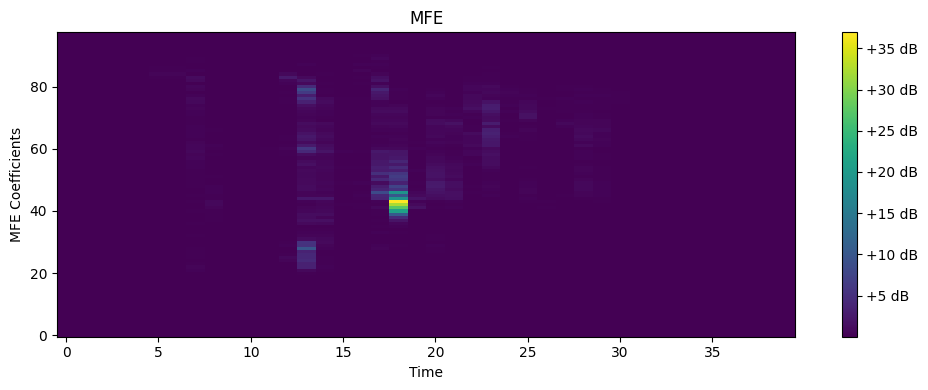

In [50]:
import matplotlib.pyplot as plt

# Hiển thị biểu đồ MFCC
plt.figure(figsize=(10, 4))
plt.imshow(df_mfe[0] , aspect='auto', origin='lower', cmap='viridis')
plt.title('MFE')
plt.xlabel('Time')
plt.ylabel('MFE Coefficients')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()